In [1]:
#직업,성별과 수입의 관계, #직업 비율 구하기 #교육 수준과 수입의 관계 #나이구룹별로 어떤 직업에 종사 하는지 #실업자 비율


import pandas as pd
import numpy as np
pd.set_option('display.max_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 100)
# col 생략 없이 출력
pd.set_option('display.max_columns', 100)

In [3]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [59]:
wf = pd.read_csv('Korea Income and Welfare.csv')
jc = pd.read_excel('job_code_translated.xlsx')
wf.drop(columns=['wave'], inplace=True)
wf.replace(' ', 0, inplace=True)
wf= wf.astype(int)
jc['대분류'].ffill(inplace=True)
jc= jc[['대분류','job_code','job_title']] 
jc = jc.iloc[:,[1,0,2]].rename(columns={'대분류':'job_category'})
wf.iloc[:,:-3] = wf.iloc[:,:-3].abs()                                                   # - 는 전부 + 로 대체
total = wf.merge(jc, left_on=['occupation'],right_on = ['job_code'],how='outer')        # wf와 jc 데이터 합치기
total['age'] = total['year']-total['year_born']                                         # age열 추가
total.iloc[:,[10,11,12]] = total.iloc[:,[10,11,12]].replace(0,None)                     # 0으로 처리한 NaN 자료 복구
total['age_range']=pd.cut(total['age'],10)
total.info()
total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92857 entries, 0 to 92856
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  92857 non-null  int32   
 1   year                92857 non-null  int32   
 2   region              92857 non-null  int32   
 3   income              92857 non-null  int32   
 4   family_member       92857 non-null  int32   
 5   gender              92857 non-null  int32   
 6   year_born           92857 non-null  int32   
 7   education_level     92857 non-null  int32   
 8   marriage            92857 non-null  int32   
 9   religion            92857 non-null  int32   
 10  occupation          59214 non-null  object  
 11  company_size        59215 non-null  object  
 12  reason_none_worker  32146 non-null  object  
 13  job_code            53153 non-null  float64 
 14  job_category        53153 non-null  object  
 15  job_title           53153 non-null  

,id,year,region,income,family_member,gender,year_born,education_level,marriage,religion,occupation,company_size,reason_none_worker,job_code,job_category,job_title,age,age_range
0,10101,2005,1,614,1,2,1936,2,2,2,None,None,8,NaN,NaN,NaN,69,"(63.8, 72.6]"
1,10101,2011,1,896,1,2,1936,2,2,2,None,None,10,NaN,NaN,NaN,75,"(72.6, 81.4]"
2,10101,2012,1,1310,1,2,1936,2,2,2,None,None,10,NaN,NaN,NaN,76,"(72.6, 81.4]"
3,10101,2013,1,2208,1,2,1936,2,2,2,None,None,1,NaN,NaN,NaN,77,"(72.6, 81.4]"
4,10101,2014,1,864,1,2,1936,2,2,2,None,None,10,NaN,NaN,NaN,78,"(72.6, 81.4]"


In [6]:
pd.set_option('display.max_columns', 100)

In [31]:
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [109]:
income_by_occu=pd.DataFrame(total.groupby(['occupation','job_category','gender'])[['job_title','income']].mean('income'))
income_by_occu #직업,성별과 수입의 관계

income
occupation job_category        gender              
111        1 관리자               1        9572.352941
                               2        2667.375000
112        1 관리자               1       13864.736842
120        1 관리자               1        8033.056122
                               2        3017.142857
131        1 관리자               1        7696.310811
                               2        3764.222222
132        1 관리자               1        9798.697183
133        1 관리자               1        8222.941176
                               2        5190.200000
134        1 관리자               1       12062.545455
135        1 관리자               1        7058.795455
139        1 관리자               1        8379.085106
                               2        2656.000000
141        1 관리자               1        8909.978142
                               2        5118.500000
149        1 관리자               1        8745.895238
                               2        4838.000000
151        1 관리자               1        9359.315589
                               2        2948.500000
152        1 관리자               1        7820.417143
                               2        4029.333333
153        1 관리자               1        7641.503876
                               2        2802.034483
159        1 관리자               1        9506.760274
                               2        4902.000000
211        2 전문가 및 관련 종사자      1        8170.151515
                               2        5302.111111
212        2 전문가 및 관련 종사자      1        5901.315789
                               2        4268.000000
213        2 전문가 및 관련 종사자      1        6328.826087
221        2 전문가 및 관련 종사자      1        9208.040404
                               2        2948.750000
222        2 전문가 및 관련 종사자      1        8048.481633
                               2        4425.260870
223        2 전문가 및 관련 종사자      1        9465.258065
                               2        4134.375000
224        2 전문가 및 관련 종사자      1        7455.325000
231        2 전문가 및 관련 종사자      1        6921.327543
                               2        5556.300000
232        2 전문가 및 관련 종사자      1        6572.776860
233        2 전문가 및 관련 종사자      1        8181.319149
                               2        2376.000000
234        2 전문가 및 관련 종사자      1        5850.725490
                               2        2472.500000
235        2 전문가 및 관련 종사자      1        8689.481994
                               2        3677.000000
236        2 전문가 및 관련 종사자      1        7729.513699
                               2        2880.000000
237        2 전문가 및 관련 종사자      1        6278.774194
239        2 전문가 및 관련 종사자      1        6616.167630
                               2        2971.000000
241        2 전문가 및 관련 종사자      1       12244.042105
                               2        6668.705882
242        2 전문가 및 관련 종사자      1        5281.772727
                               2        2401.285714
243        2 전문가 및 관련 종사자      1        3471.965517
                               2        3931.272727
244        2 전문가 및 관련 종사자      2        3890.550000
245        2 전문가 및 관련 종사자      1        5453.670103
                               2        2738.559322
246        2 전문가 및 관련 종사자      1        5515.380282
                               2        3554.000000
247        2 전문가 및 관련 종사자      1        5737.122449
                               2        3354.524590
248        2 전문가 및 관련 종사자      1        4327.097744
                               2        2542.863636
251        2 전문가 및 관련 종사자      1        9576.747368
                               2        3033.578947
252        2 전문가 및 관련 종사자      1        8524.602500
                               2        4178.541176
253        2 전문가 및 관련 종사자      1        5700.000000
                               2        2859.487179
254        2 전문가 및 관련 종사자      1        6019.324873
                               2        2913.220779
259        2 전문가 및 관련 종사자      1        5

In [116]:
income_by_occu=pd.DataFrame(total.groupby(['occupation','job_category','gender','job_title'])[['income']].mean('income'))
income_by_occu #직업별 수입 평균

income
occupation job_category        gender job_title                                                       
111        1 관리자               1      Assembly members, senior public officials and e...   9572.352941
                               2      Assembly members, senior public officials and e...   2667.375000
112        1 관리자               1      senior corporate executive                          13864.736842
120        1 관리자               1      Administrative and management support manager        8033.056122
                               2      Administrative and management support manager        3017.142857
131        1 관리자               1      Research, education and legal manager                7696.310811
                               2      Research, education and legal manager                3764.222222
132        1 관리자               1      Insurance and Finance Manager                        9798.697183
133        1 관리자               1      Health and social welfare manager                    8222.941176
                               2      Health and social welfare manager                    5190.200000
134        1 관리자               1      Managers related to culture, art, design and video  12062.545455
135        1 관리자               1      Information and communication related manager        7058.795455
139        1 관리자               1      Other professional service manager                   8379.085106
                               2      Other professional service manager                   2656.000000
141        1 관리자               1      Construction, electricity and production managers    8909.978142
                               2      Construction, electricity and production managers    5118.500000
149        1 관리자               1      Other construction, electricity and production ...   8745.895238
                               2      Other construction, electricity and production ...   4838.000000
151        1 관리자               1      Sales and transport manager                          9359.315589
                               2      Sales and transport manager                          2948.500000
152        1 관리자               1      Customer Service Manager                             7820.417143
                               2      Customer Service Manager                             4029.333333
153        1 관리자               1      Managers related to environment, cleaning and e...   7641.503876
                               2      Managers related to environment, cleaning and e...   2802.034483
159        1 관리자               1      Other sales and customer service managers            9506.760274
                               2      Other sales and customer service managers            4902.000000
211        2 전문가 및 관련 종사자      1      Life and natural science experts                     8170.151515
                               2      Life and natural science experts                     5302.111111
212        2 전문가 및 관련 종사자      1      Humanities and social sciences experts               5901.315789
                               2      Humanities and social sciences experts               4268.000000
213        2 전문가 및 관련 종사자      1      Laboratory for bio and natural sciences              6328.826087
221        2 전문가 및 관련 종사자      1      Computer Hardware and Communication Engineering...   9208.040404
                               2      Computer Hardware and Communication Engineering...   2948.750000
222        2 전문가 및 관련 종사자      1      Information system development expert                8048.481633
                               2      Information system development expert                4425.260870
223        2 전문가 및 관련 종사자      1      Information system operator                          9465.258065
                               2      Information system operator                          4134.375000
224        2 전문가 및 관련 종사자      1      Communication and broadcasting equipment 

In [117]:
income_by_occu['count']=total.groupby(['occupation','job_category','gender','job_title'])[['income']].count() #직업별 종자사 수

In [119]:
income_by_occu.sort_values('income', ascending=False)


,,,,income,count
occupation,job_category,gender,job_title,,
112,1 관리자,1,senior corporate executive,13864.736842,38
241,2 전문가 및 관련 종사자,1,Medical professional,12244.042105,95
134,1 관리자,1,"Managers related to culture, art, design and video",12062.545455,22
132,1 관리자,1,Insurance and Finance Manager,9798.697183,142
251,2 전문가 및 관련 종사자,1,University professors and lecturers,9576.747368,95
111,1 관리자,1,"Assembly members, senior public officials and executives of public organizations",9572.352941,34
159,1 관리자,1,Other sales and customer service managers,9506.760274,146
223,2 전문가 및 관련 종사자,1,Information system operator,9465.258065,62
151,1 관리자,1,Sales and transport manager,9359.315589,263


In [120]:
income_by_occu.describe()

,income,count
count,260.000000,260.000000
mean,4773.000822,204.434615
std,2182.488846,580.436295
min,1205.055556,1.000000
25%,3009.546689,16.750000
50%,4464.370289,64.000000
75%,5980.207240,185.500000
max,13864.736842,7816.000000


In [11]:
income_by_occu_des=income_by_occu.describe()  #최고 소득자와, 최저 소득자의 차이
income_by_occu_des.loc['max']-income_by_occu_des.loc['min']

income    12659.681287
count      7815.000000
dtype: float64

In [12]:
income_by_occu_des.loc['max-min']=income_by_occu_des.loc['max']-income_by_occu_des.loc['min']

In [13]:
income_by_occu_des

,income,count
count,260.000000,260.000000
mean,4773.000822,204.434615
std,2182.488846,580.436295
min,1205.055556,1.000000
25%,3009.546689,16.750000
50%,4464.370289,64.000000
75%,5980.207240,185.500000
max,13864.736842,7816.000000
max-min,12659.681287,7815.000000


In [14]:
pd.DataFrame(total.groupby('job_title')['income'].count())['income'].sum() #53153 총 데이타 수



53153

In [15]:
job_ratio=pd.DataFrame(total.groupby('job_title')['income'].count()) #직업 비율 구하기
job_ratio['job_ratio']=job_ratio['income']/53153
job_ratio=job_ratio.sort_values(by='job_ratio',ascending=False)
job_ratio

,income,job_ratio
job_title,,
Crop cultivation worker,10079,0.189622
Cleaners and environmental cleaners,2800,0.052678
Car driver,2595,0.048821
Management-related clerk,2211,0.041597
Administrative clerk,1642,0.030892
...,...,...
Ship deck crew and related personnel,18,0.000339
Train and train engineer,17,0.000320
Managers and other cultural and art related workers,13,0.000245


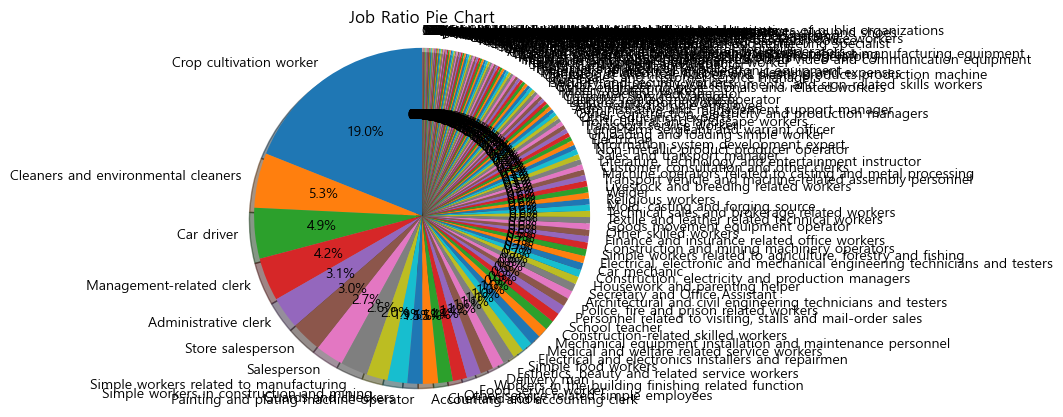

In [16]:
plt.title("Job Ratio Pie Chart")                             #직업비율 파이차트로 시각화
plt.pie(job_ratio['job_ratio'],labels=job_ratio.index,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

In [17]:
total.groupby(['education_level'])['income'].mean()

education_level
2    1057.861116
3    1809.582486
4    2714.437515
5    4148.808220
6    4951.386333
7    5908.844280
8    6840.537596
9    9071.347670
Name: income, dtype: float64

In [121]:
sorted_incomebylevel=pd.DataFrame(total.groupby(['education_level','job_title'])['income'].mean()) #교육 수준과 수입의 관계

In [122]:
sorted_incomebylevel

income
education_level job_title                                                       
2               A product rental worker                               120.000000
                Apparel manufacturing related skill workers          1622.000000
                Car driver                                           3783.636364
                Chef and cook                                        2852.133333
                Cleaners and environmental cleaners                  1434.398950
                Construction-related skilled workers                 4188.333333
                Crop cultivation worker                              1315.745915
                Customer consultation and other clerks               2601.500000
                Electrical and electronics installers and repai...   1895.000000
                Esthetics, beauty and related service workers        2525.600000
                Fishery related workers                              1134.000000
                Food service worker                                  1128.666667
                Forestry related workers                              802.000000
                Guards and checkers                                  2376.200000
                Horticultural and landscape workers                  1380.473684
                Housework and parenting helper                        922.684211
                Installation and repair personnel related to vi...   5480.666667
                Leisure and sports workers                           1046.500000
                Livestock and breeding related workers                889.500000
                Managers related to environment, cleaning and e...    694.333333
                Medical and welfare related service workers          2612.500000
                Metal machine parts assembly source                  1048.875000
                Other cosmetology/ceremony and medical assistan...   1280.900000
                Other service related simple employees               1243.074627
                Personnel related to visiting, stalls and mail-...   1114.810811
                Police, fire and prison related workers              1026.000000
                Religious workers                                    1735.000000
                Sales-related simple employee                        1825.916667
                Simple food workers                                  1348.730769
                Simple workers in construction and mining            2304.590909
                Simple workers related to agriculture, forestry...    949.044776
                Simple workers related to manufacturing              1622.839286
                Store salesperson                                    1550.555556
                Technical sales and brokerage related workers        1536.000000
3               A product rental worker                              4594.000000
                Accounting and accounting clerk                      5620.000000
                Administrative and management support manager        6438.400000
                Administrative clerk                                 4333.000000
                Administrative expert                                2520.000000
                Apparel manufacturing related skill workers          1977.727273
                Architectural and civil engineering technicians...   1370.000000
                Assembly members, senior public officials and e...   3315.000000
                Beverage manufacturing related machine operator      2520.000000
                Car driver                                           3992.015873
                Car mechanic                                         4241.925000
                Chef and cook                                        3253.348214
                Chemical engineering technicians and testers         2109.000000
                Cleaners and environmental cleaners                  1998.239016
                Construc

In [48]:
groupbyage=pd.DataFrame(total.groupby(['age_range','job_title'])['income'].count()) #나이구룹별로 어떤 직업에 종사 하는지
groupbyage=groupbyage.rename(columns={'income':'count'})
groupbyage[groupbyage['count'] != 0]


count
age_range      job_title                                                
(10.912, 19.8] Administrative clerk                                    1
               Customer consultation and other clerks                  1
               Electrical and electronic parts and product ass...      2
               Esthetics, beauty and related service workers           2
               Food service worker                                     1
               Laboratory for bio and natural sciences                 1
               Livestock and breeding related workers                  1
               Operator of chemical, rubber and plastic produc...      1
               Other service related simple employees                  1
               Secretary and Office Assistant                          2
               Security and security workers                           1
               Simple food workers                                     2
               Simple workers related to manufacturing                 6
               Store salesperson                                       1
               Transport equipment maintenance worker                  1
               Travel, information and reception clerk                 1
(19.8, 28.6]   A product rental worker                                 2
               Accounting and accounting clerk                        61
               Administrative and management support manager          12
               Administrative clerk                                   71
               Air conditioning and heating related facility o...      1
               Aircraft/ship engineer and controller                   5
               Apparel manufacturing related skill workers             2
               Architectural and civil engineering technicians...     15
               Assembly members, senior public officials and e...      1
               Automatic assembly line and industrial robot op...      3
               Beverage manufacturing related machine operator         1
               Car driver                                              8
               Car mechanic                                           14
               Chef and cook                                          20
               Chemical engineering technicians and testers            6
               Cleaners and environmental cleaners                     9
               Communication and broadcasting equipment engineer       1
               Construction, electricity and production managers       4
               Construction-related skilled workers                    2
               Crop cultivation worker                                 1
               Curator, librarian and records manager                  6
               Customer Service Manager                                5
               Customer consultation and other clerks                 32
               Delivery man                                           13
               Electrical and electronic parts and product ass...      9
               Electrical and electronics installers and repai...     16
               Electrical, electronic and mechanical engineeri...     12
               Electrician                                             1
               Environmental engineering technician and tester         3
               Esthetics, beauty and related service workers          50
               Finance and insurance experts                           3
               Finance and insurance related office workers           28
               Food processing related machine operator                4
               Food processing related personnel                       4
               Food service worker                                    20
               Goods movement equipment operator                       2
               Guards and checkers                                     5
               HR and Management Professional       

In [54]:
groupbyage_income=pd.DataFrame(total.groupby('age_range')['income'].mean()) #에이지 구룹별 평균 소득
groupbyage_income

,income
age_range,
"(10.912, 19.8]",1556.173913
"(19.8, 28.6]",3182.273474
"(28.6, 37.4]",4698.555291
"(37.4, 46.2]",5266.137403
"(46.2, 55.0]",5130.812928
"(55.0, 63.8]",3962.503435
"(63.8, 72.6]",2272.140531
"(72.6, 81.4]",1545.485657
"(81.4, 90.2]",1198.280783


In [102]:
agebygroup_noworker=pd.DataFrame(total.groupby('age_range')['reason_none_worker'].count()) #대상인원 중 일하지 않는 사람의 수
agebygroup_noworker


,reason_none_worker
age_range,
"(10.912, 19.8]",17
"(19.8, 28.6]",123
"(28.6, 37.4]",379
"(37.4, 46.2]",879
"(46.2, 55.0]",1916
"(55.0, 63.8]",3376
"(63.8, 72.6]",8927
"(72.6, 81.4]",11795
"(81.4, 90.2]",4455


In [105]:
agebygroup_noworker['age_group_size']=pd.DataFrame(total.groupby('age_range')['reason_none_worker'].size())#실업률 계산
agebygroup_noworker.loc['total']=agebygroup_noworker.apply(sum)	




In [107]:
agebygroup_noworker['age_group_unempolyed_rate']=agebygroup_noworker['reason_none_worker']/agebygroup_noworker['age_group_size']
agebygroup_noworker	

,reason_none_worker,age_group_size,age_group_unempolyed_rate
age_range,,,
"(10.912, 19.8]",17,46,0.369565
"(19.8, 28.6]",123,1949,0.063109
"(28.6, 37.4]",379,9224,0.041088
"(37.4, 46.2]",879,14432,0.060906
"(46.2, 55.0]",1916,14449,0.132604
"(55.0, 63.8]",3376,12081,0.279447
"(63.8, 72.6]",8927,17811,0.501207
"(72.6, 81.4]",11795,17360,0.679435
"(81.4, 90.2]",4455,5214,0.854430
